In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r"D:\cybersucess\Jupyter Notebook\IPl data analysis\matches.csv")

In [3]:
dataset.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [5]:
dataset.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

# Data Cleaning :-

In [6]:
# Column 'Method' is not useful so we can delete method column to avoid missing value 
dataset['method'].unique()
dataset.drop(columns=['method'],inplace=True)

In [7]:
dataset.shape[0]

1095

In [8]:
dataset.isnull().sum().sum()

86

In [9]:
# dataset.dropna.shape[0]

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
for i in ['team1','team2','toss_winner','winner']:
    dataset[i].replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)
    dataset[i].replace('Rising Pune Supergiant','Pune Warriors',inplace=True)
    dataset[i].replace('Delhi Daredevils','Delhi Capitals',inplace=True)
    dataset[i].replace('Kings XI Punjab','Punjab Kings',inplace=True)
    dataset[i].replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
    dataset[i].replace('Gujarat Lions','Gujarat Titans',inplace=True)
    dataset[i].replace('Royal Challengers Bengaluru','Royal Challengers Bangalore',inplace=True)

In [13]:
for i in ['team1','team2','toss_winner','winner']:
    dataset[i].replace('Kolkata Knight Riders','KKR',inplace=True)
    dataset[i].replace('Chennai Super Kings','CSK',inplace=True)
    dataset[i].replace('Delhi Capitals','DC',inplace=True)
    dataset[i].replace('Royal Challengers Bangalore','RCB',inplace=True)
    dataset[i].replace('Rajasthan Royals','RR',inplace=True)
    dataset[i].replace('Punjab Kings','PBKS',inplace=True)
    dataset[i].replace('Sunrisers Hyderabad','SRH',inplace=True)
    dataset[i].replace('Mumbai Indians','MI',inplace=True)
    dataset[i].replace('Pune Warriors','PW',inplace=True)
    dataset[i].replace('Kochi Tuskers Kerala','KTK',inplace=True)
    dataset[i].replace('Gujarat Titans','GT',inplace=True)
    dataset[i].replace('Lucknow Super Giants','LSG',inplace=True)

# Q1 Kis Season mai sabse jyada matches hue hai

In [14]:
# plt.figure(figsize=(10,4))
# sns.countplot(x='season',data=dataset)
# plt.xticks(rotation=80)
# plt.savefig("Matches per season.jpg")
# plt.show()
 
# As above countplot does not give assending order graph so we cant use it

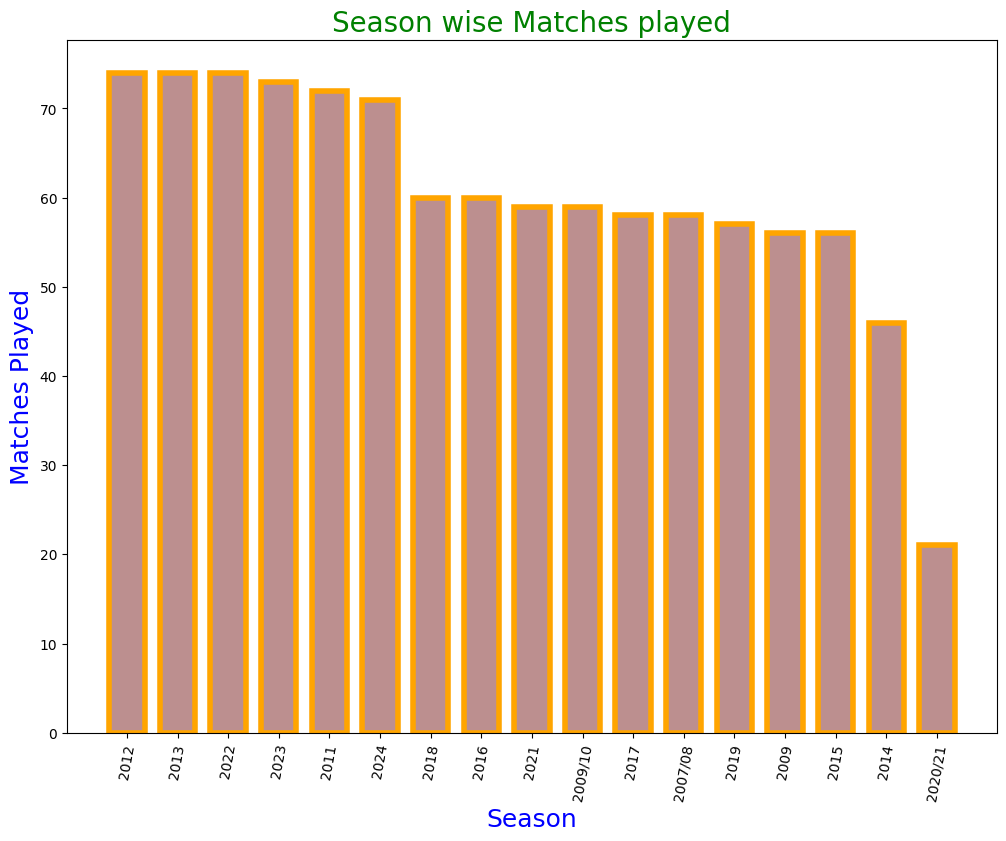

In [15]:
x = dataset['season'].value_counts().index
y = dataset['season'].value_counts().values
plt.figure(figsize=(12,9))
plt.bar(x,y,color="rosybrown",edgecolor="orange",linewidth=4,width=0.7)
plt.xticks(rotation=80)
plt.xlabel("Season", c="blue", fontsize = 18 )
plt.ylabel("Matches Played", c="blue", fontsize = 18 )
plt.title("Season wise Matches played",fontsize=20,c="green" )
plt.savefig("Season wise Matches played.jpg")
plt.show()


# Q2 Kis City mai sabse jyada matches hue hai(Top 5 cities)

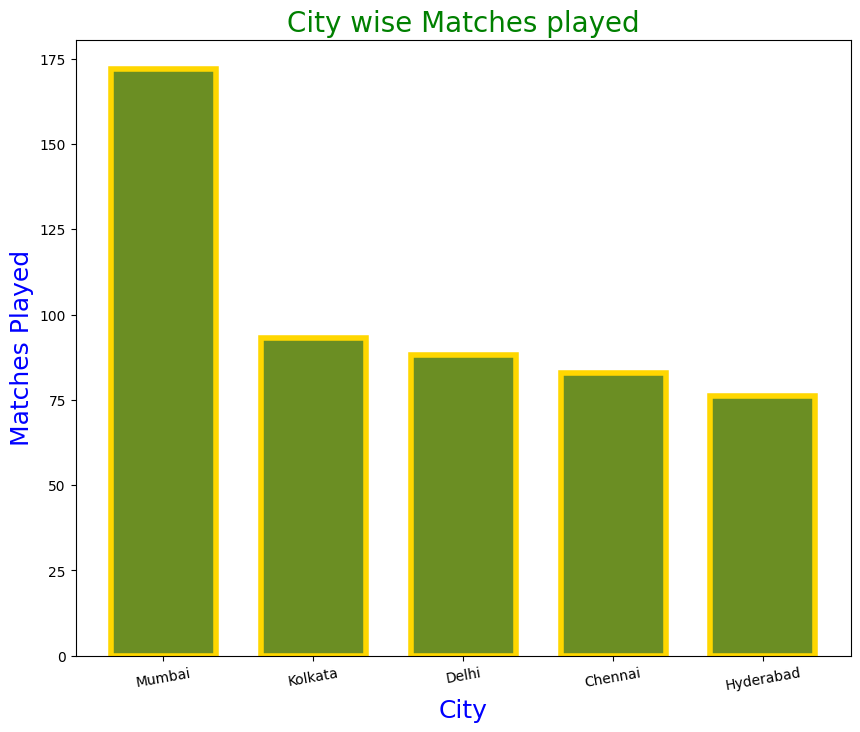

In [16]:
x1 = dataset['city'].value_counts()[:5].index
y1 = dataset['city'].value_counts()[:5].values
plt.figure(figsize=(10,8))
plt.bar(x1,y1,color="olivedrab",edgecolor="gold",linewidth=4,width=0.7)
plt.xticks(rotation=10)
plt.xlabel("City" , c="blue", fontsize = 18)
plt.ylabel("Matches Played" , c="blue", fontsize = 18)
plt.title("City wise Matches played",fontsize=20,c="green" )
plt.savefig("City wise Matches played.jpg")
plt.show()

# Q3 Top 5 Player of Match jitne wale Players kon h

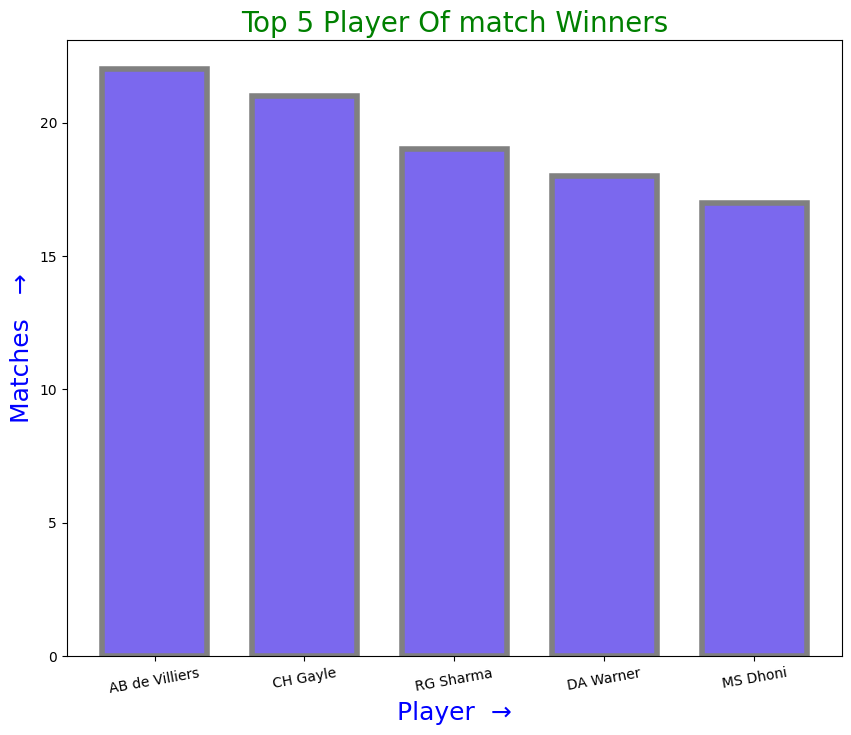

In [17]:
x2 = dataset['player_of_match'].value_counts()[:5].index
y2 = dataset['player_of_match'].value_counts()[:5].values
plt.figure(figsize=(10,8))
plt.bar(x2,y2,color="mediumslateblue",edgecolor="grey",linewidth=4,width=0.7)
plt.xticks(rotation=10)
plt.xlabel("Player  →", c="blue", fontsize = 18)
plt.ylabel("Matches   →", c="blue", fontsize = 18)
plt.title("Top 5 Player Of match Winners",fontsize=20,c="green")
plt.savefig("Top 5 Player Of match Winners.jpg")
plt.show()

# Q 4 Sabse jyada winning team konsi hai

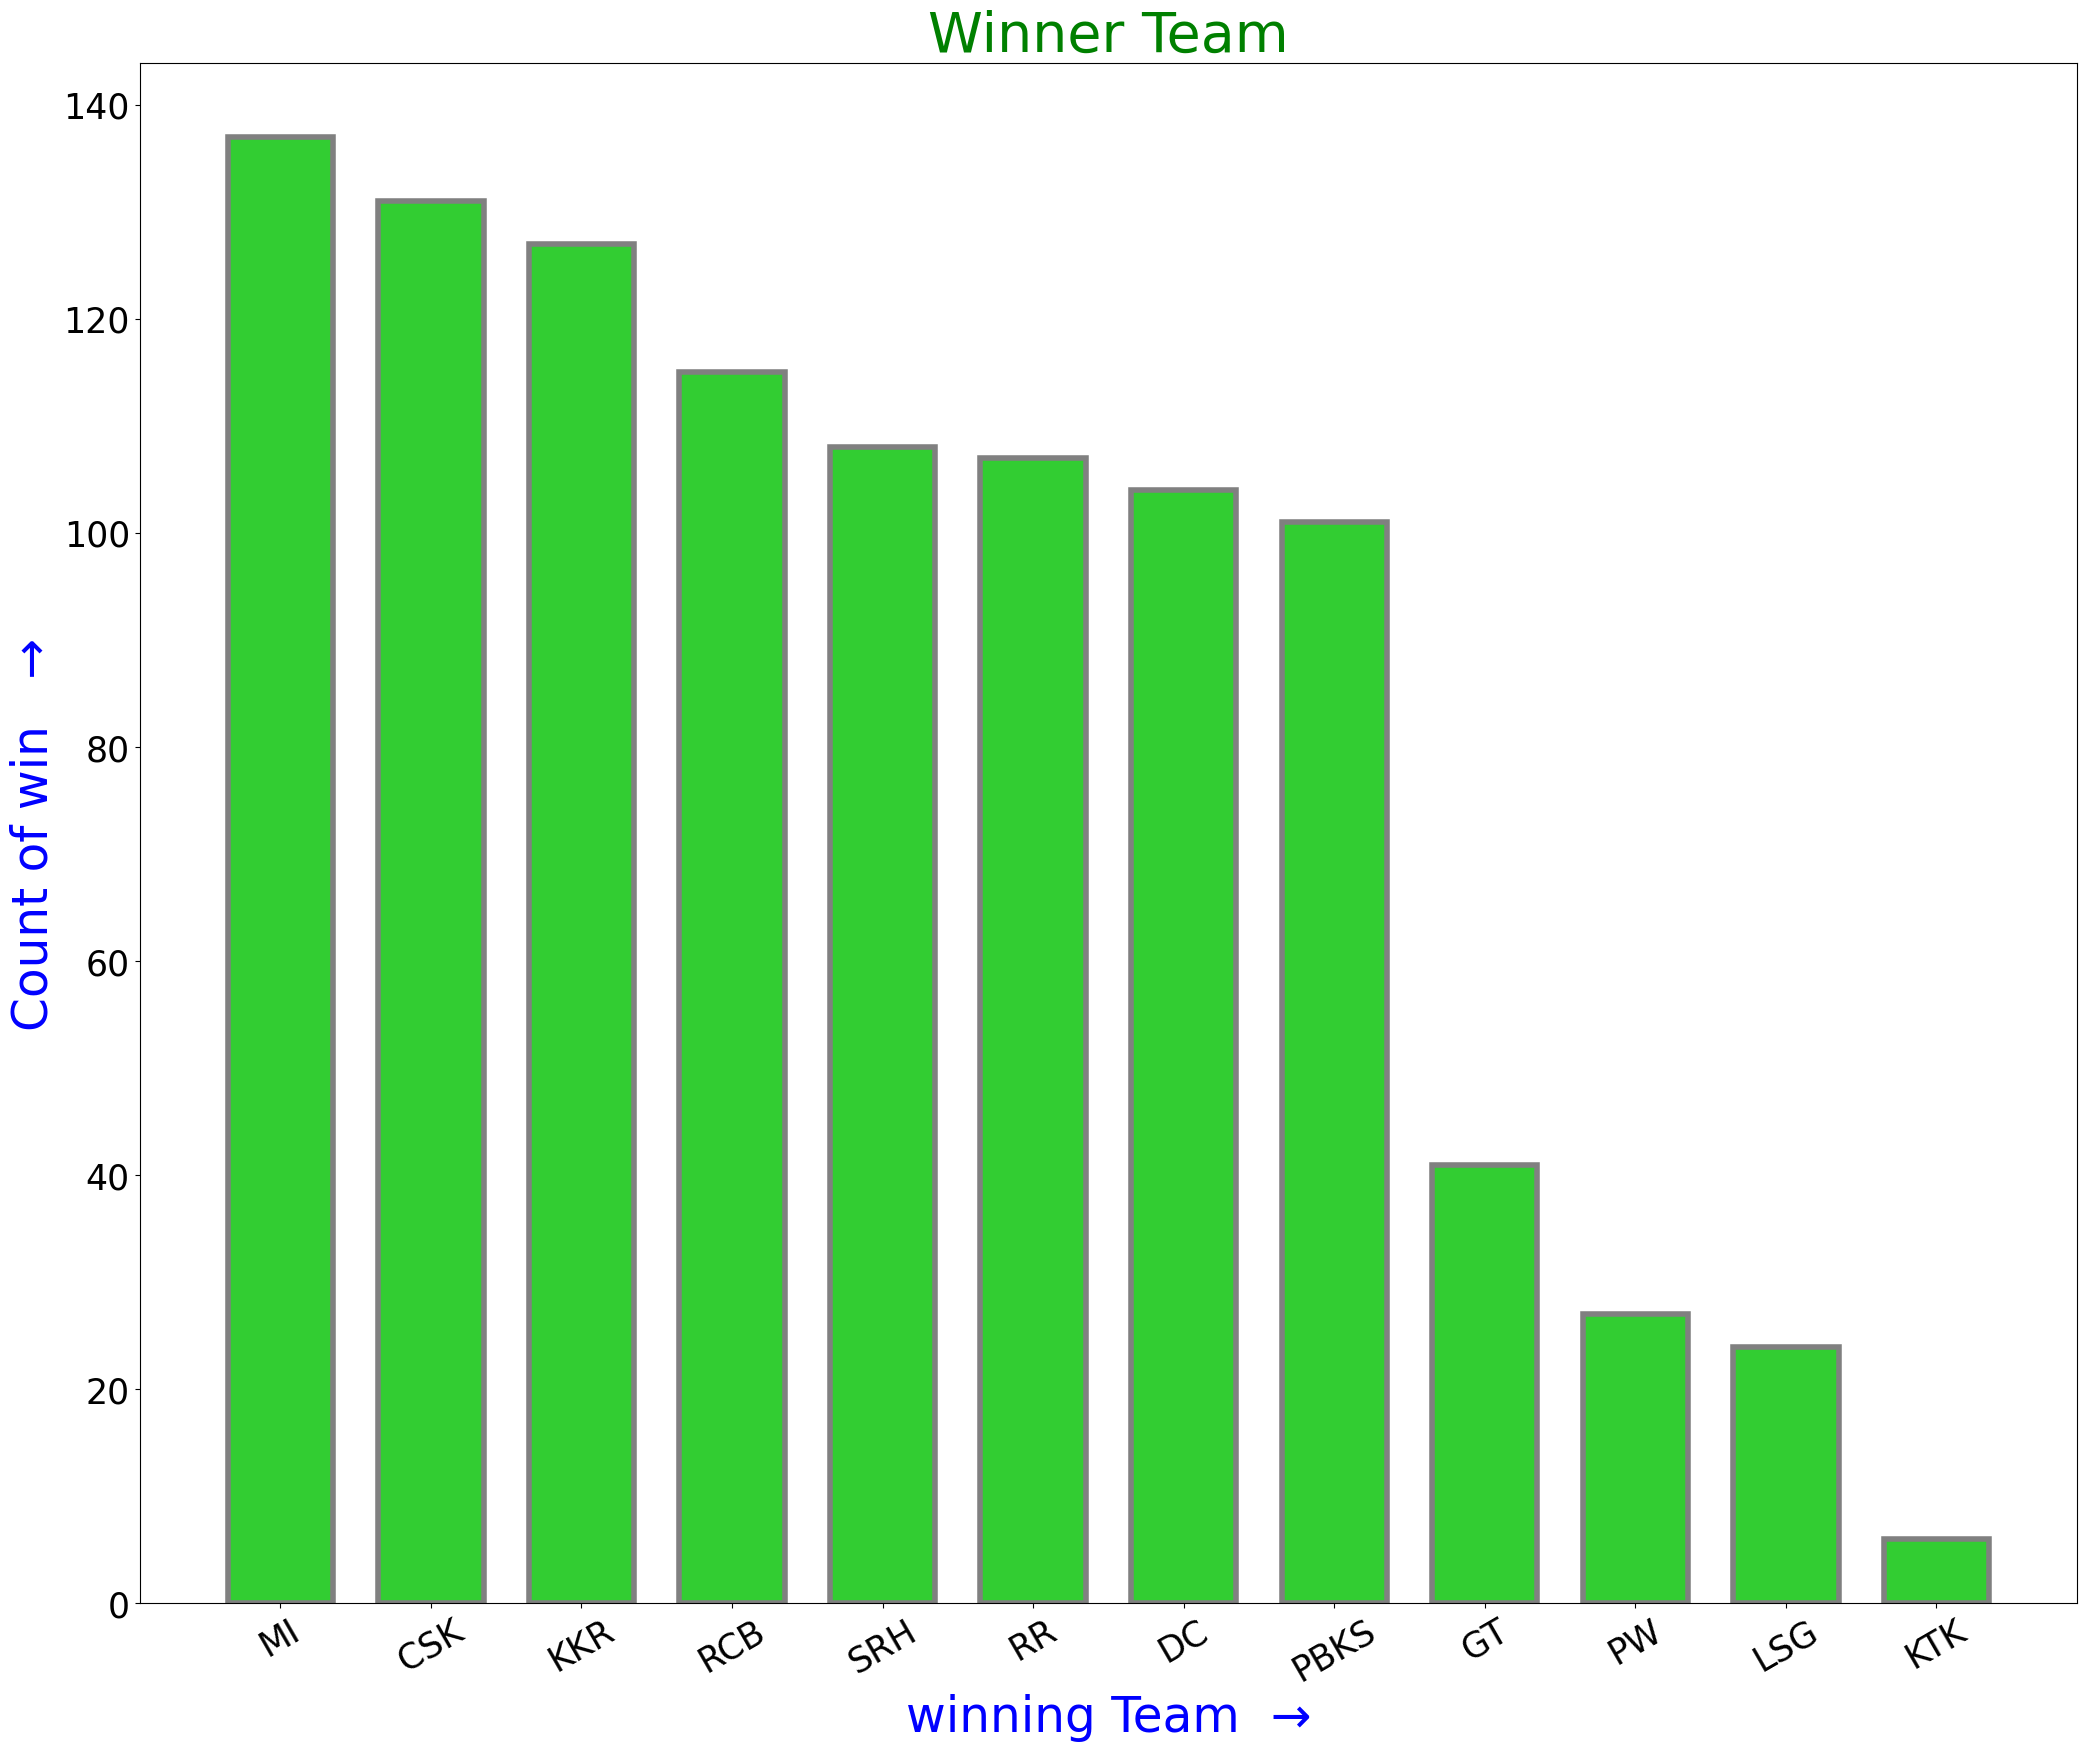

In [18]:
x3 = dataset['winner'].value_counts().index
y3 = dataset['winner'].value_counts().values
plt.figure(figsize=(25,20))
plt.bar(x3,y3,color="limegreen",edgecolor="grey",linewidth=4,width=0.7)
plt.xticks(rotation=30,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("winning Team  →", c="blue", fontsize = 35)
plt.ylabel("Count of win   →", c="blue", fontsize = 35)
plt.title("Winner Team",fontsize=40,c="green")
plt.savefig("Winners.jpg")
plt.show()

# Q5 Sabse Jyada jitne wali Team Runs Se Jeeti ya Wickets Se ??

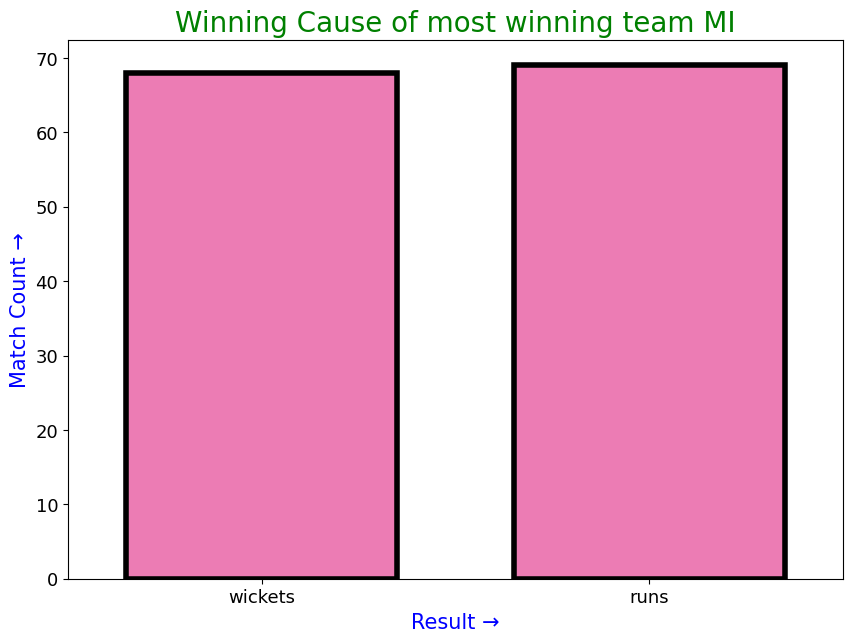

In [19]:
winner_team = dataset['winner'].value_counts()[:1].index[0]
df = dataset[dataset['winner']==winner_team]
plt.figure(figsize=(10,7))
sns.countplot(x='result',data=df,color="hotpink",edgecolor="black",linewidth=4,width=0.7)
plt.xlabel('Result →',c='blue',fontsize=15)
plt.ylabel('Match Count →',c='blue',fontsize=15)
plt.title(f'Winning Cause of most winning team {winner_team}',fontsize=20,c="green")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('Winning Cause of most winning team.jpg')

# Q 6 Toss jitne par teams batting lete hai ya fielding lete hai

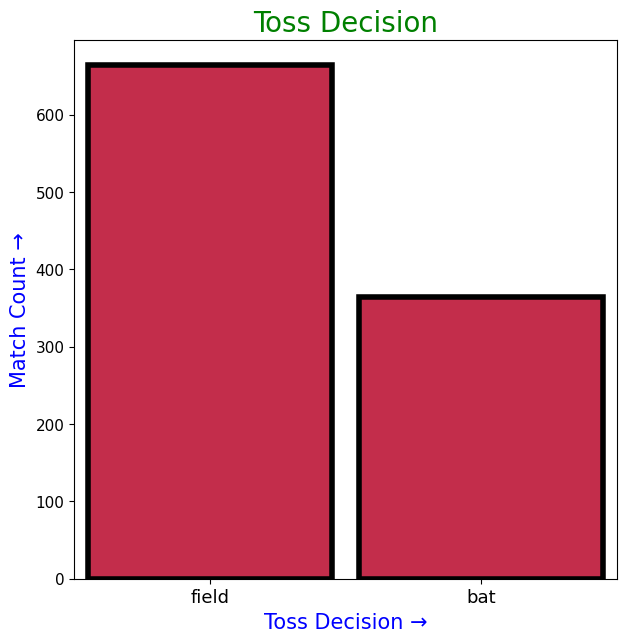

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x='toss_decision',data=dataset,color='crimson',edgecolor='black',width=0.9,linewidth=4)
plt.xlabel('Toss Decision →',c='blue',fontsize=15)
plt.ylabel('Match Count →',c='blue',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
plt.title('Toss Decision',c='green',fontsize=20)
plt.savefig('Toss Decision.jpg')
plt.show()


# Q 7 Top 10 teams jo sabse jyada toss jitti hai

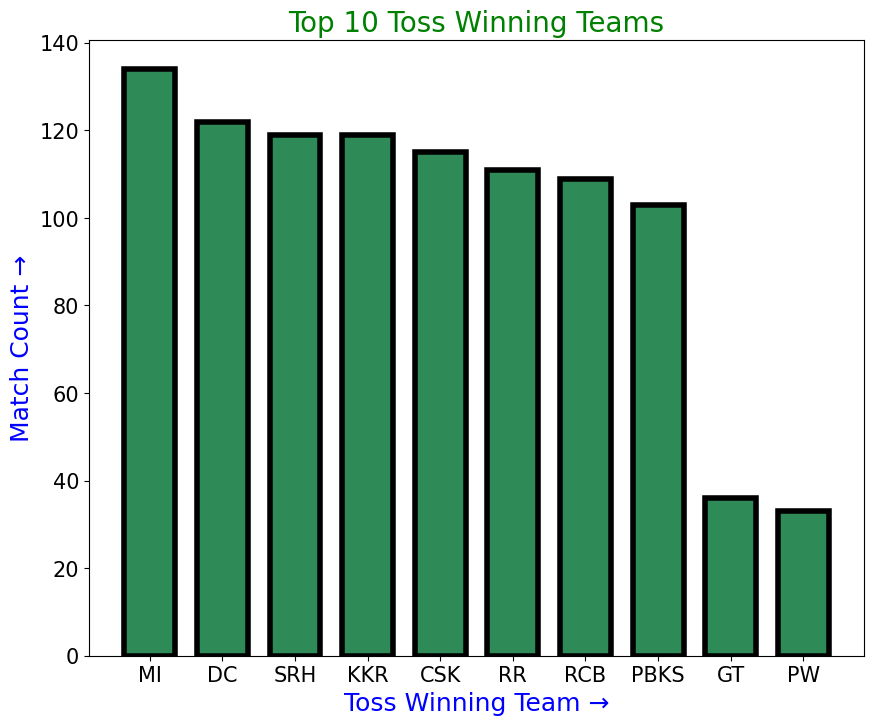

In [21]:
x4 = dataset['toss_winner'].value_counts()[:10].index
y4 = dataset['toss_winner'].value_counts()[:10].values
plt.figure(figsize=(10,8))
plt.bar(x4,y4,color='seagreen',edgecolor='black',linewidth=4,width=0.7)
plt.xlabel('Toss Winning Team →',c='blue',fontsize=18)
plt.ylabel('Match Count →', c= 'blue',fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Top 10 Toss Winning Teams',c= 'green',fontsize = 20)
plt.savefig('Top 10 Toss Winning Teams.jpg')
plt.show()



# Q 8 Particular Stadium mai Sabse Jyada Jitne wali Team Konsi Hai

In [22]:
dataset['winner'].value_counts()
dataset['venue'].value_counts()

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         72
M Chinnaswamy Stadium                                                    62
Feroz Shah Kotla                                                         59
Rajiv Gandhi International Stadium, Uppal                                48
Sawai Mansingh Stadium                                                   47
MA Chidambaram Stadium, Chepauk                                          47
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
MA Chidambaram Stadium, Chepauk, Chennai                                 27
Sheikh Zayed Stadium                                                     27
Narendra Modi Stadium, Ahmedabad                                         24
Maharashtra Cricket Association Stadium                                  22
Dr DY 

In [23]:
# winner_team = dataset['winner'].value_counts()[:1].index[0]
# df = dataset[dataset['winner']==winner_team]
# plt.figure(figsize=(10,7))
# sns.countplot(x='result',data=df,color="hotpink",edgecolor="black",linewidth=4,width=0.7)
# plt.xlabel('Result →',c='blue',fontsize=15)
# plt.ylabel('Match Count →',c='blue',fontsize=15)
# plt.title(f'Winning Cause of most winning team {winner_team}',fontsize=20,c="green")
# plt.xticks(fontsize=13)
# plt.yticks(fontsize=13)
# plt.savefig('Winning Cause of most winning team.jpg')

# Q 9 Home Stadium par home team kitni bar jeeti hai aur kitni bar haari hai  

# Q 10 Sabse jyada runs se jeete hai ya batting se

# Q 11 If today koi team 1 ya team 2 ho toh, usmai toss kon jeetega, aur match kon jeetega, further wo runs se jeetega ya balls se jeetega

# Q 12 Sabse Jyada Runs kis Season mai bane hain

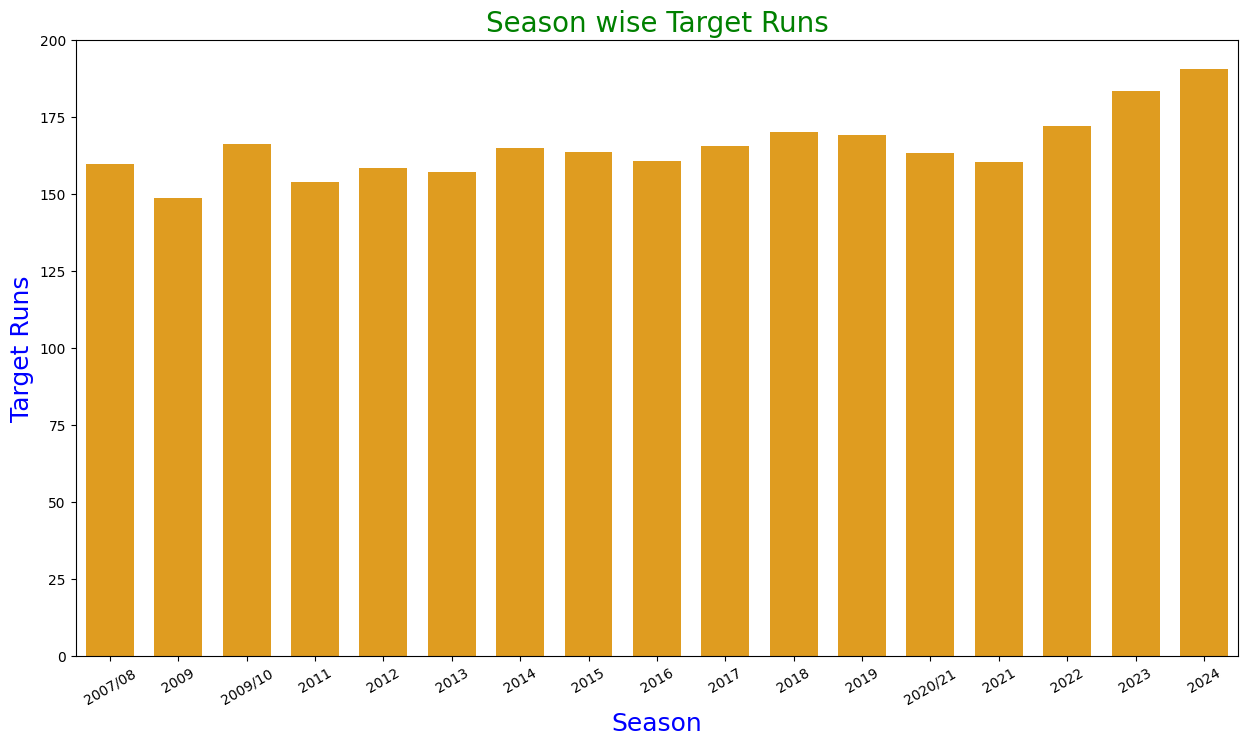

In [45]:
# dataset['season'].value_counts().index
plt.figure(figsize=(15,8))
sns.barplot(x='season',y='target_runs',data=dataset,errorbar=('ci',0),estimator='average',color='orange',width=0.7)
plt.xticks(rotation=30)
plt.xlabel("Season", c="blue", fontsize = 18 )
plt.ylabel("Target Runs", c="blue", fontsize = 18 )
plt.title("Season wise Target Runs",fontsize=20,c="green" )
plt.savefig("Season wise Target Runs.jpg")
plt.show()

# Q 13 Is There any super over match till date